# ATIVIDADE DE APROFUNDAMENTO 01


**Universidade Presbiteriana Mackenzie**

Ciência de Dados (Big Data Analytics)

Big Data Analytics – Análise Estatística

***


**Nome**: Daiane Klein 				
Turma 01R


***



## PELICAN STORE

A Pelican Stores, uma divisão da National Clothing, é uma cadeia de lojas de roupas
femininas que opera em todos os Estados Unidos. Recentemente, a cadeia realizou uma
promoção na qual cupons de desconto foram enviados aos clientes de outras lojas da
National Clothing. Dados coletados para uma amostra de 100 transações de cartões de
crédito nas lojas Pelican Stores durante um dia, durante a promoção, estão no arquivo
PelicanStores.csv.

A Tabela abaixo mostra uma parte do conjunto de dados. O método de
pagamento chamado “Cartão Proprietário” se refere a cobranças feitas utilizando um
cartão de crédito da National Clothing. Os clientes que fizeram uma compra utilizando um
cupom de descontos são denominados clientes promocionais e os clientes que fizeram uma
compra sem utilizar um cupom de desconto são chamados clientes regulares. Como os
cupons promocionais não foram enviados aos clientes Pelican Stores regulares, a
administração considera as negociações feitas para pessoas apresentando cupons
promocionais como vendas que, de outro modo, não teriam sido efetuadas. Naturalmente, a
Pelican também espera que os clientes promocionais continuem a comprar em suas lojas.

***

**OBS.:**

1. Cartão Proprietário: Cartão de crédito da National Clothing

2. Com cupom de desconto: Cliente Promocionais

3. Sem cupom de desconto: Cliente Regulares

4. Clientes promocionais, caso não tivesse sido enviados cupons, as vendas (destes clientes) não teriam sidos efetuadas.

5. Expectativa de que clientes promocionais voltem a comprar.

## Bibliotecas

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import variation

## Dataset

In [9]:
df = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/Documentos/Disciplinas/Módulo 03/Estatística/Aprofundamento 01/PelicanStores.csv',
                 sep = ',',
                dtype={'Cliente' : str},
                decimal =',')
df

,Cliente,Tipo de Cliente,Itens,Vendas líquidas,Método de Pagamento,Gênero,Estado Civil,Idade
0,1,Regular,1,39.50,Discover,Masculino,Casado,32
1,2,Promocional,1,102.40,Cartão Proprietário,Feminino,Casado,36
2,3,Regular,1,22.50,Cartão Proprietário,Feminino,Casado,32
3,4,Promocional,5,100.40,Cartão Proprietário,Feminino,Casado,28
4,5,Regular,2,54.00,MasterCard,Feminino,Casado,34
...,...,...,...,...,...,...,...,...
95,96,Regular,1,39.50,MasterCard,Feminino,Casado,44
96,97,Promocional,9,253.00,Cartão Proprietário,Feminino,Casado,30
97,98,Promocional,10,287.59,Cartão Proprietário,Feminino,Casado,52
98,99,Promocional,2,47.60,Cartão Proprietário,Feminino,Casado,30


## DICIONÁRIO DE DADOS

In [10]:
df.dtypes

Cliente                 object
Tipo de Cliente         object
Itens                    int64
Vendas líquidas        float64
Método de Pagamento     object
Gênero                  object
Estado Civil            object
Idade                    int64
dtype: object

In [11]:
df.columns

Index(['Cliente', 'Tipo de Cliente', 'Itens', 'Vendas líquidas',
       'Método de Pagamento', 'Gênero', 'Estado Civil', 'Idade'],
      dtype='object')

Nome da Variável 	Descrição 	Tipo de Variável 	Tipo de Mensuração 	Valores Possíveis
Cliente	ID do cliente	Categórica	Qualitativa Nominal	Número da identificação do cliente
Tipo de Cliente	Tipo de compra efetuada	Categórica	Qualitativa Nominal	Categoria Promocional = Com cupom de desconto ou Categoria Regular = Sem cupom de desconto
Itens	O número total de itens comprados	inteiro	Quantitativa Discreta	Números inteiros
Vendas Líquidas	A quantia total ($) cobrada pelo cartão de crédito	Float	Quantitativa Contínua	Números decimais
Método de Pagamento	Método de Pagamento da compra	Categórica	Qualitativa Nominal	Métodos de Pagamentos aceitos nas lojas
Gênero	Gênero do Cliente	Categórica	Qualitativa Nominal	Feminino/Masculino/Não Declarado
Estado Civil	Estado Civil do Cliente	Categórica	Qualitativa Nominal	"Solteiro
Casado
Separado
Divorciado
Viúvo"
Idade	Idade do Cliente	Inteiro	Quantitativa Discreta	Números Inteiros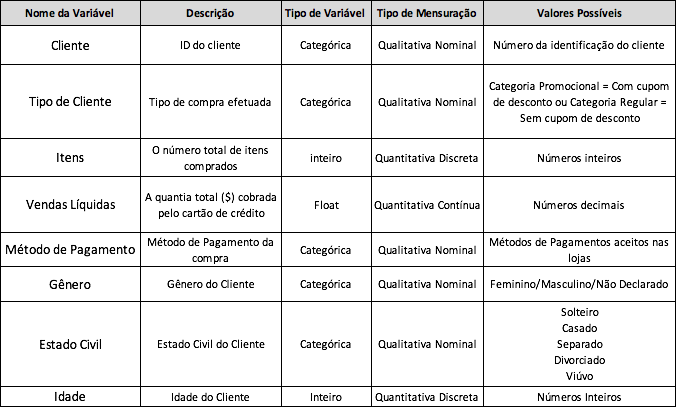

## ESTATÍSTICA DESCRITIVA

### VARIÁVEIS NUMÉRICAS

In [14]:
df.describe()

,Itens,Vendas líquidas,Idade
count,100.00000,100.000000,100.000000
mean,3.22000,77.600500,43.080000
std,2.73614,55.664938,12.389047
min,1.00000,13.230000,20.000000
25%,1.00000,39.600000,32.000000
50%,2.00000,59.705000,42.000000
75%,4.00000,100.900000,50.000000
max,17.00000,287.590000,78.000000


In [17]:
# Selecionando variáveis numericas
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas

,Itens,Vendas líquidas,Idade
0,1,39.50,32
1,1,102.40,36
2,1,22.50,32
3,5,100.40,28
4,2,54.00,34
...,...,...,...
95,1,39.50,44
96,9,253.00,30
97,10,287.59,52
98,2,47.60,30


In [82]:
estat = []

for i in numericas:
    estat.append({ 
        'media' : numericas[i].mean(),
        'median' : numericas[i].median(),
        'desvio_padrao' : numericas[i].std(),
        'variancia' : numericas[i].var(),
        'moda' : numericas[i].mode()[0]})
    
estat = pd.DataFrame(estat, index=[numericas.columns])
    
estat

,media,median,desvio_padrao,variancia,moda
Itens,3.2200,2.000,2.736140,7.486465,1.0
Vendas líquidas,77.6005,59.705,55.664938,3098.585370,31.6
Idade,43.0800,42.000,12.389047,153.488485,46.0


### VARIÁVEIS CATEGÓRICAS

In [97]:
categoricas = df.select_dtypes(exclude =['int64', 'float64'])
categoricas.drop(columns=['Cliente'], inplace = True)

categoricas

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tipo de Cliente,Método de Pagamento,Gênero,Estado Civil
0,Regular,Discover,Masculino,Casado
1,Promocional,Cartão Proprietário,Feminino,Casado
2,Regular,Cartão Proprietário,Feminino,Casado
3,Promocional,Cartão Proprietário,Feminino,Casado
4,Regular,MasterCard,Feminino,Casado
...,...,...,...,...
95,Regular,MasterCard,Feminino,Casado
96,Promocional,Cartão Proprietário,Feminino,Casado
97,Promocional,Cartão Proprietário,Feminino,Casado
98,Promocional,Cartão Proprietário,Feminino,Casado


In [92]:
estat = []

for i in categoricas:
    estat.append({ 
        'media' : categoricas[i].mode()[0]})
    
estat = pd.DataFrame(estat, index=[categoricas.columns])
    
estat

,media
Tipo de Cliente,Promocional
Método de Pagamento,Cartão Proprietário
Gênero,Feminino
Estado Civil,Casado


In [117]:
# Contando e agrupando
table = categoricas.apply(pd.Series.value_counts)

# Alterando o tipo de dado para object e os valores nuloes (nan) para a palavra 'None'
table = table.astype(object).replace(np.nan, 'None')

# Substituindo a palavra 'None' para vazio (a fim de facilitar a visualização)
table = table.replace('None', '')

table

,Tipo de Cliente,Método de Pagamento,Gênero,Estado Civil
American Express,,2,,
Cartão Proprietário,,70,,
Casado,,,,84
Discover,,4,,
Feminino,,,93,
Masculino,,,7,
MasterCard,,14,,
Promocional,70,,,
Regular,30,,,
Solteiro,,,,16
